In [1]:
import pandas as pd

In [2]:
exemplo = pd.DataFrame({
    "Aluno": ["Eduardo","Joyce","João Pedro"],
    "Prova": [1,9,8],
    "Seminario": [10,5,7]
})
exemplo

,Aluno,Prova,Seminario
0,Eduardo,1,10
1,Joyce,9,5
2,João Pedro,8,7


<AxesSubplot:>

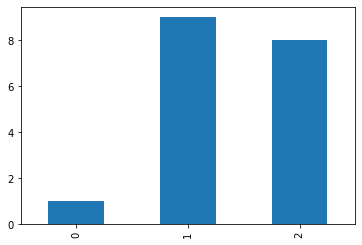

In [3]:
exemplo["Prova"].plot.bar()

In [4]:
exemplo.index = exemplo["Aluno"]
exemplo.plot.bar?

<AxesSubplot:xlabel='Aluno'>

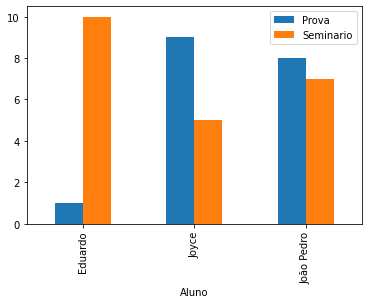

In [5]:
exemplo.plot.bar()

In [6]:
coleta = pd.read_csv('pontos-de-coletas-residuos.csv', sep=";")
coleta

,tiporesiduo,bairro,endereco,complemento,observacao,latitude,longitude
0,"metal,isopor,papel,plastico,vidro",Recife,Av. Cais do Apolo,Prefeitura do Recife (área interna ),Prefeitura do Recife,-8.054732,-34.872078
1,"metal,isopor,papel,plastico,vidro",Recife,Rua do Bom Jesus,Em frente ao Museu Arq. e Pça do Arsenal,Ecoponto,-8.061468,"-34.871037"""
2,"metal,isopor,papel,plastico,vidro",Recife,Av. Marques de Olinda,Calçada da cimento nassau( em frete ao marco z...,Ecoponto,-8.063282,-34.871568
3,"metal,isopor,papel,plastico,vidro",Recife,Av. Rio Branco,Calçada do Banco do Brasil,Ecoponto,-8.062334,-34.873668
4,"metal,isopor,papel,plastico,vidro",Recife,Av. Rio Branco,Em frente a delgacia,Ecoponto,-8.062777,-34.872173
...,...,...,...,...,...,...,...
130,Pneu,Madalena,"Av. Abdias de Carvalho, 341",Pneus Pirelle,NaN,-8.061416,-34.9087182
131,Pneu,Espinheiro,"Av. Norte, 2261",Bridgestone Pneus,NaN,-8.039216,-34.893334
132,Pneu,São José,"Rua Lourenço de Sá, 165",Pneu Verde,NaN,-8.074329,-34.8980205
133,Lampada,Imbiribeira,"Rua Francisco Correa de Moraes, 100",Carrefour RBV Boa Viagem,NaN,-8.124149,-34.9132995


<AxesSubplot:>

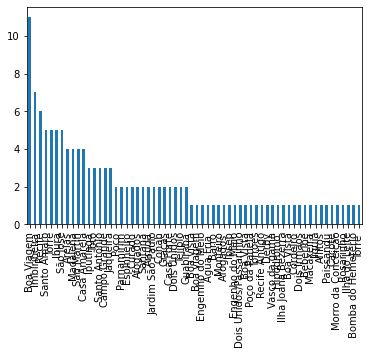

In [7]:
coleta["bairro"].value_counts().plot.bar()

<AxesSubplot:>

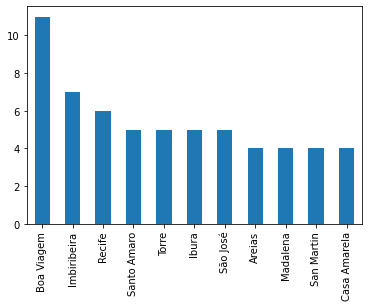

In [8]:
bairro_count = coleta["bairro"].value_counts()
bairros_maior_4 = bairro_count[bairro_count >= 4]
bairros_maior_4.plot.bar()

In [9]:
outros = bairro_count[bairro_count < 4]
outros_serie = pd.Series(outros.sum(), index=["Outros"])
outros_serie

Outros    75
dtype: int64

<AxesSubplot:>

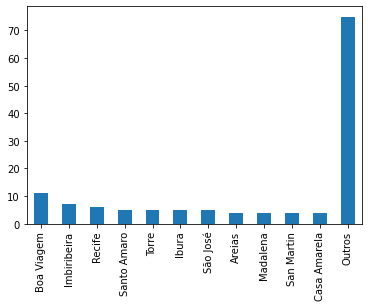

In [10]:
bairros_maior_4.append(outros_serie).plot.bar()

<AxesSubplot:ylabel='tiporesiduo'>

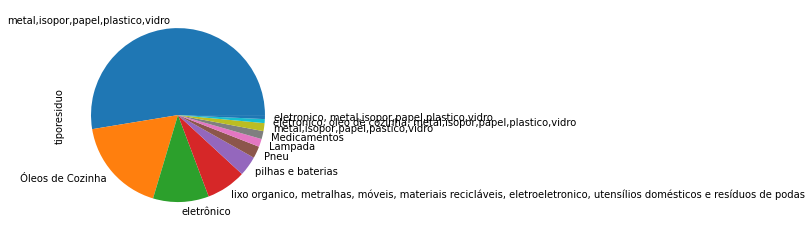

In [11]:
coleta["tiporesiduo"].value_counts().plot.pie()

In [12]:
coleta["tiporesiduo"].unique()

array(['metal,isopor,papel,plastico,vidro',
       'metal,isopor,papel,pastico,vidro',
       'lixo organico, metralhas, móveis, materiais recicláveis, eletroeletronico, utensílios domésticos e resíduos de podas',
       'eletrônico', 'pilhas e baterias ', 'Medicamentos',
       ' Óleos de Cozinha',
       'eletronico, metal,isopor,papel,plastico,vidro',
       'eletronico, oleo de cozinha, metal,isopor,papel,plastico,vidro',
       'Pneu', 'Lampada'], dtype=object)

In [13]:
coleta["tiporesiduo"] = coleta["tiporesiduo"].str.replace(" Óleos de Cozinha", "óleo de cozinha")
coleta["tiporesiduo"] = coleta["tiporesiduo"].str.replace("pastico", "plastico")
coleta["tiporesiduo"] = coleta["tiporesiduo"].str.replace("plastico", "plástico")
coleta["tiporesiduo"] = coleta["tiporesiduo"].str.replace("eletronico", "eletrônico")
coleta["tiporesiduo"] = coleta["tiporesiduo"].str.replace(" Óleos de Cozinha", "óleo de cozinha")
coleta["tiporesiduo"] = coleta["tiporesiduo"].str.replace("Lampada", "Lâmpada")
coleta["tiporesiduo"] = coleta["tiporesiduo"].str.replace("organico", "orgânico")
coleta["tiporesiduo"] = coleta["tiporesiduo"].str.replace("oleo de cozinha", "óleo de cozinha")
coleta["tiporesiduo"] = coleta["tiporesiduo"].str.replace("pilhas e baterias ", "pilhas e baterias")

coleta["tiporesiduo"].unique()

array(['metal,isopor,papel,plástico,vidro',
       'lixo orgânico, metralhas, móveis, materiais recicláveis, eletroeletrônico, utensílios domésticos e resíduos de podas',
       'eletrônico', 'pilhas e baterias', 'Medicamentos',
       'óleo de cozinha', 'eletrônico, metal,isopor,papel,plástico,vidro',
       'eletrônico, óleo de cozinha, metal,isopor,papel,plástico,vidro',
       'Pneu', 'Lâmpada'], dtype=object)

<AxesSubplot:ylabel='tiporesiduo'>

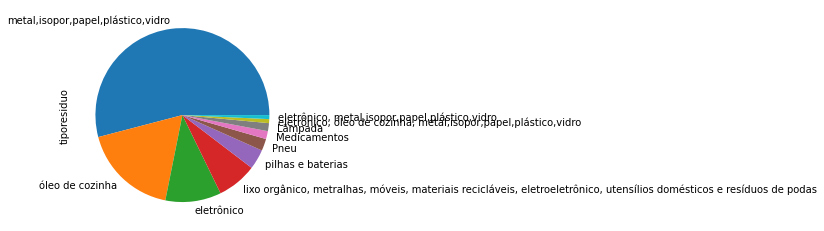

In [14]:
coleta["tiporesiduo"].value_counts().plot.pie()

In [27]:
# Exemplo Completo

import copy # Biblioteca que faz uma copia do valor
indice = copy.copy(coleta.index) # Copio o indice como ele esta antes das mudancas
for i in indice: # Para cada linha
    linha = copy.copy(coleta.loc[i]) # Copia a linha
    item_atual = linha["tiporesiduo"] # Ve qual o tipo de residuo
    if (item_atual.find(",") != -1): # Se tem virgula
        coleta = coleta.drop([i]) # Apaga a linha
        itens_separados = item_atual.split(",") # S
        for item in itens_separados:
            linha["tiporesiduo"] = item
            coleta.append(linha)
        
coleta


,tiporesiduo,bairro,endereco,complemento,observacao,latitude,longitude
45,eletrônico,San Martin,"Rua Vinte e Um de Abril, 3370",EMPREL,EMPREL,-8.067670,-34.938081
46,eletrônico,Boa Vista,"Av. Conde da Boa Vista, 867",URB,URB,-8.058303,-34.888518
48,eletrônico,Curado,"Rodovia BR 232, s/n - Curado",NaN,Jardim Botânico do Recife,-8.076071,-34.966706
49,eletrônico,Areias,"Av. Recife, 3587 - Areias",Próximo ao Hospital Geral de Areias,EMLURB,-8.102022,-34.927986
50,eletrônico,Beberibe,"Rua Melânio de Barros Correia, 26",NaN,ESCOLA PROFISSIONALIZANTE DE BEBERIBE ZULEIDE ...,-8.003058,-34.899059
51,eletrônico,Casa Amarela,"Av. Norte Miguel Arraes, 5600",NaN,ESCOLA PROFISSIONAL DOM BOSCO,-8.021548,-34.916639
52,eletrônico,Totó,Av 11 de Agosto,Bidu Krause,ESCOLA PROFISSIONAL ANEXA AO CSU BIDU KRAUSE,-8.079778,-34.970345
53,eletrônico,Recife,Av. Cais do Apolo,Mídia Express,Prefeitura do Recife,-8.054547,-34.871993
54,pilhas e baterias,Casa Forte,"Dr. João Santos Filho, 255",NaN,Shopping Plaza no estacionamento do térreo,-8.036359,-34.913042
55,pilhas e baterias,Boa Viagem,"Rua Padre Carapuceiro, 777",NaN,Nagem Informática,-8.120844,-34.904384


<AxesSubplot:ylabel='tiporesiduo'>

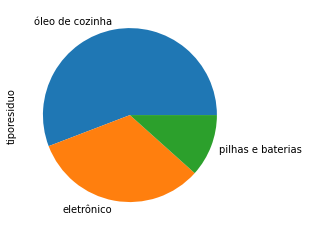

In [28]:
# coleta [ (coleta["tiporesiduo"] == "eletrônico") | (coleta["tiporesiduo"] == "pilhas e baterias") |   ]
coleta[coleta.tiporesiduo.isin(["eletrônico", "pilhas e baterias", "óleo de cozinha"])]["tiporesiduo"].value_counts().plot.pie()

In [17]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

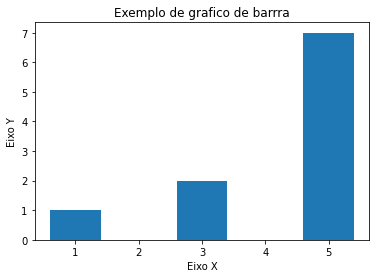

In [18]:
x = [1, 3, 5]
y = [1, 2, 7]

plt.title("Exemplo de grafico de barrra")
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.bar(x, y)

In [19]:
bairros_maior_4.index

Index(['Boa Viagem', 'Imbiribeira', 'Recife', 'Santo Amaro', 'Torre', 'Ibura',
       'São José', 'Areias', 'Madalena', 'San Martin', 'Casa Amarela'],
      dtype='object')

In [20]:
bairros_maior_4.values

array([11,  7,  6,  5,  5,  5,  5,  4,  4,  4,  4], dtype=int64)

<BarContainer object of 11 artists>

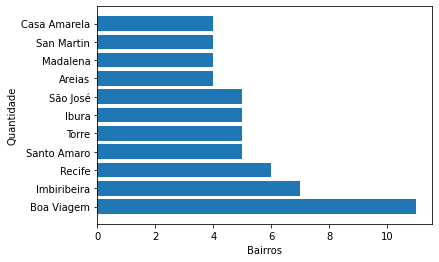

In [21]:
plt.xlabel("Bairros")
plt.ylabel("Quantidade")
plt.barh(bairros_maior_4.index, bairros_maior_4.values)